In [23]:
import spacy
import nltk
from nltk.util import ngrams
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [4]:
!pip install nltk matplotlib


Cargar el texto del libro

In [7]:

import urllib.request

# URL del libro en Project Gutenberg
url = "https://www.gutenberg.org/files/11/11-0.txt"

# Descargar el texto
response = urllib.request.urlopen(url)
texto = response.read().decode('utf-8')

# Verificar las primeras líneas del texto
print(texto[:1000])  # Muestra los primeros 1000 caracteres para asegurarse de que se descargó correctamente



*** START OF THE PROJECT GUTENBERG EBOOK 11 ***
[Illustration]




Alice’s Adventures in Wonderland

by Lewis Carroll

THE MILLENNIUM FULCRUM EDITION 3.0

Contents

 CHAPTER I.     Down the Rabbit-Hole
 CHAPTER II.    The Pool of Tears
 CHAPTER III.   A Caucus-Race and a Long Tale
 CHAPTER IV.    The Rabbit Sends in a Little Bill
 CHAPTER V.     Advice from a Caterpillar
 CHAPTER VI.    Pig and Pepper
 CHAPTER VII.   A Mad Tea-Party
 CHAPTER VIII.  The Queen’s Croquet-Ground
 CHAPTER IX.    The Mock Turtle’s Story
 CHAPTER X.     The Lobster Quadrille
 CHAPTER XI.    Who Stole the Tarts?
 CHAPTER XII.   Alice’s Evidence




CHAPTER I.
Down the Rabbit-Hole


Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into
the book her sister was reading, but it had no pictures or
conversations in it, “and what is the use of a book,” thought Alice
“without pictures or conversat


tokenizar el texto

In [18]:

nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
import nltk
import urllib.request


nltk.download('punkt')


url = "https://www.gutenberg.org/files/11/11-0.txt"


response = urllib.request.urlopen(url)
texto = response.read().decode('utf-8')


tokens = nltk.word_tokenize(texto)


print(tokens[:20])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['*', '*', '*', 'START', 'OF', 'THE', 'PROJECT', 'GUTENBERG', 'EBOOK', '11', '*', '*', '*', '[', 'Illustration', ']', 'Alice', '’', 's', 'Adventures']


Generar n-gramas

In [24]:
from nltk.util import ngrams

# Generar n-gramas de longitud 2 (bi-gramas)
ngramas_2 = ngrams(tokens_spacy, 2)

# Mostrar los primeros 10 n-gramas
print(list(ngramas_2)[:10])

# Generar n-gramas de longitud 3 (tri-gramas)
ngramas_3 = ngrams(tokens_spacy, 3)

# Mostrar los primeros 10 n-gramas de longitud 3
print(list(ngramas_3)[:10])





[('*', '*'), ('*', '*'), ('*', 'START'), ('START', 'OF'), ('OF', 'THE'), ('THE', 'PROJECT'), ('PROJECT', 'GUTENBERG'), ('GUTENBERG', 'EBOOK'), ('EBOOK', '11'), ('11', '*')]
[('*', '*', '*'), ('*', '*', 'START'), ('*', 'START', 'OF'), ('START', 'OF', 'THE'), ('OF', 'THE', 'PROJECT'), ('THE', 'PROJECT', 'GUTENBERG'), ('PROJECT', 'GUTENBERG', 'EBOOK'), ('GUTENBERG', 'EBOOK', '11'), ('EBOOK', '11', '*'), ('11', '*', '*')]


In [26]:
from nltk import FreqDist

# Calcular la frecuencia de los n-gramas
freq_ngramas_2 = FreqDist(ngramas_2)

# Mostrar las 10 combinaciones de n-gramas más comunes
print(freq_ngramas_2.most_common(10))


[]


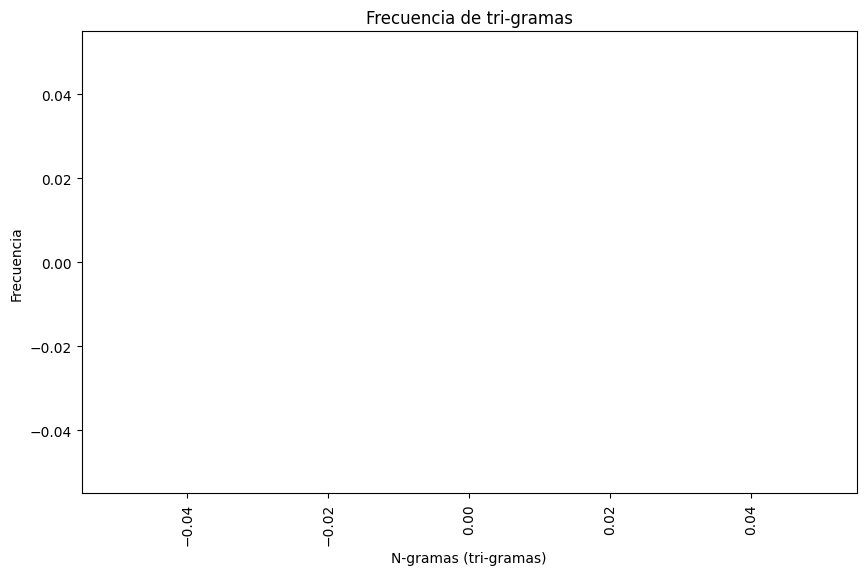

In [30]:
# Calcular la frecuencia de los tri-gramas
freq_ngramas_3 = FreqDist(ngramas_3)

# Graficar la frecuencia de los tri-gramas
plt.figure(figsize=(10, 6))
plt.bar([str(ngram) for ngram in freq_ngramas_3.keys()], freq_ngramas_3.values())
plt.xlabel("N-gramas (tri-gramas)")
plt.ylabel("Frecuencia")
plt.title("Frecuencia de tri-gramas")
plt.xticks(rotation=90)  # Rota las etiquetas para mayor legibilidad
plt.show()


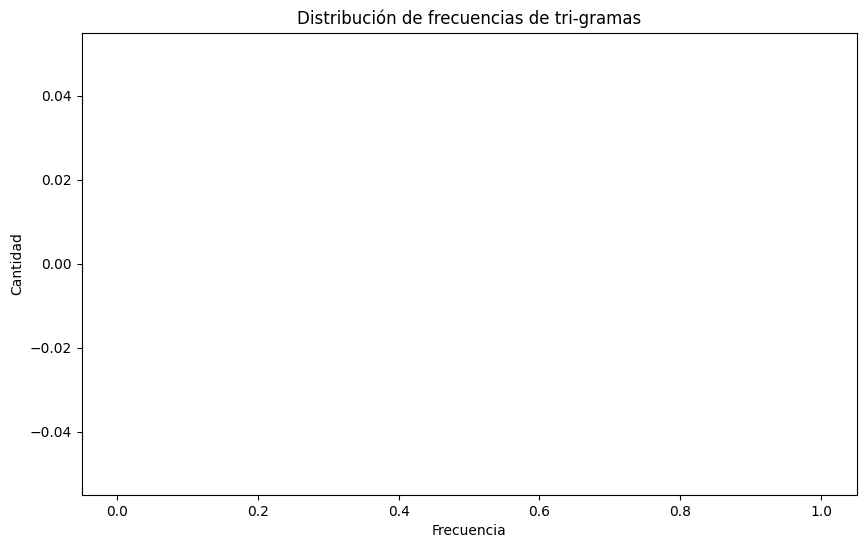

In [31]:
# Graficar la distribución de frecuencias de los tri-gramas
plt.figure(figsize=(10, 6))
plt.hist(freq_ngramas_3.values(), bins=10)
plt.xlabel("Frecuencia")
plt.ylabel("Cantidad")
plt.title("Distribución de frecuencias de tri-gramas")
plt.show()



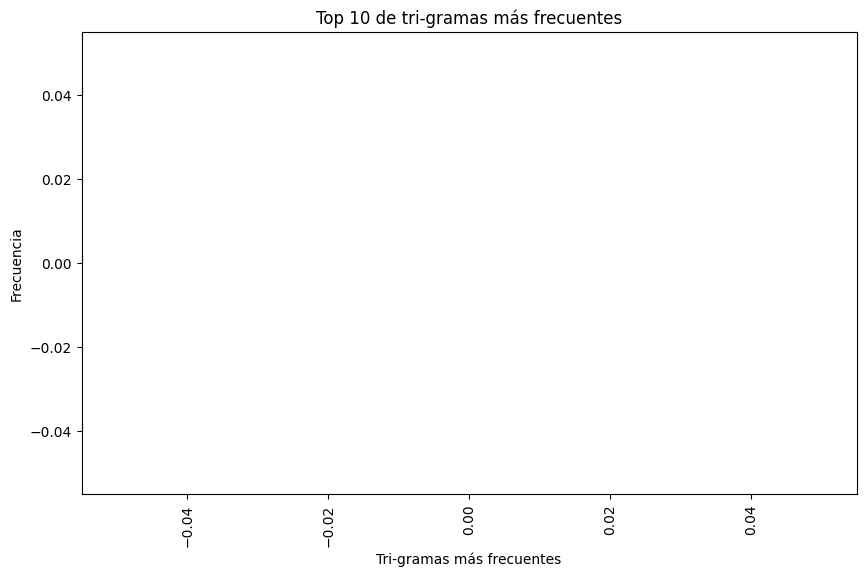

In [32]:
# Graficar los tri-gramas más frecuentes
ngramas_mas_frecuentes_3 = freq_ngramas_3.most_common(10)

plt.figure(figsize=(10, 6))
plt.bar([str(ngram[0]) for ngram in ngramas_mas_frecuentes_3], [ngram[1] for ngram in ngramas_mas_frecuentes_3])
plt.xlabel("Tri-gramas más frecuentes")
plt.ylabel("Frecuencia")
plt.title("Top 10 de tri-gramas más frecuentes")
plt.xticks(rotation=90)  # Rota las etiquetas para mayor legibilidad
plt.show()


Tarea

1. Cambiar la longitud de los n-gramas a 4 o 5

Primeros 10 cuatrigramas:
[('*', '*', '*', 'START'), ('*', '*', 'START', 'OF'), ('*', 'START', 'OF', 'THE'), ('START', 'OF', 'THE', 'PROJECT'), ('OF', 'THE', 'PROJECT', 'GUTENBERG'), ('THE', 'PROJECT', 'GUTENBERG', 'EBOOK'), ('PROJECT', 'GUTENBERG', 'EBOOK', '11'), ('GUTENBERG', 'EBOOK', '11', '*'), ('EBOOK', '11', '*', '*'), ('11', '*', '*', '*')]


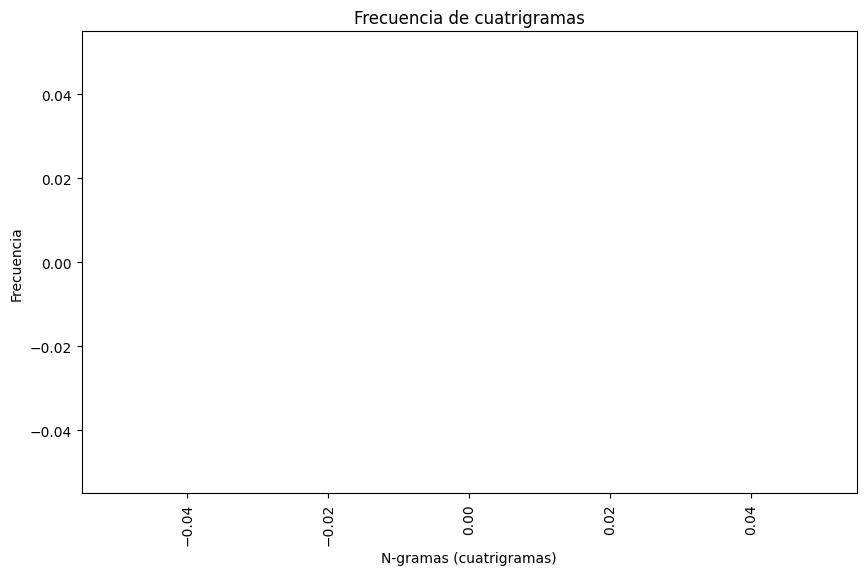

In [33]:
# Generar n-gramas de longitud 4 (cuatrigramas)
ngramas_4 = ngrams(tokens, 4)

# Mostrar los 10 primeros n-gramas de longitud 4
print("Primeros 10 cuatrigramas:")
print(list(ngramas_4)[:10])

# Calcular la frecuencia de los cuatrigramas
freq_ngramas_4 = FreqDist(ngramas_4)

# Graficar la frecuencia de los cuatrigramas
plt.figure(figsize=(10, 6))
plt.bar([str(ngram) for ngram in freq_ngramas_4.keys()], freq_ngramas_4.values())
plt.xlabel("N-gramas (cuatrigramas)")
plt.ylabel("Frecuencia")
plt.title("Frecuencia de cuatrigramas")
plt.xticks(rotation=90)
plt.show()


Primeros 10 pentagramas:
[('*', '*', '*', 'START', 'OF'), ('*', '*', 'START', 'OF', 'THE'), ('*', 'START', 'OF', 'THE', 'PROJECT'), ('START', 'OF', 'THE', 'PROJECT', 'GUTENBERG'), ('OF', 'THE', 'PROJECT', 'GUTENBERG', 'EBOOK'), ('THE', 'PROJECT', 'GUTENBERG', 'EBOOK', '11'), ('PROJECT', 'GUTENBERG', 'EBOOK', '11', '*'), ('GUTENBERG', 'EBOOK', '11', '*', '*'), ('EBOOK', '11', '*', '*', '*'), ('11', '*', '*', '*', '[')]


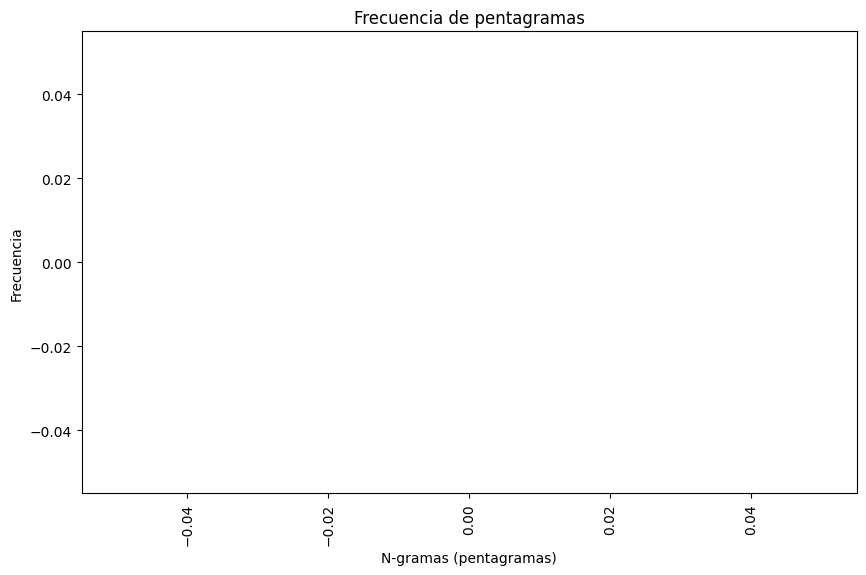

In [34]:
# Generar n-gramas de longitud 5 (pentagramas)
ngramas_5 = ngrams(tokens, 5)

# Mostrar los 10 primeros n-gramas de longitud 5
print("Primeros 10 pentagramas:")
print(list(ngramas_5)[:10])

# Calcular la frecuencia de los pentagramas
freq_ngramas_5 = FreqDist(ngramas_5)

# Graficar la frecuencia de los pentagramas
plt.figure(figsize=(10, 6))
plt.bar([str(ngram) for ngram in freq_ngramas_5.keys()], freq_ngramas_5.values())
plt.xlabel("N-gramas (pentagramas)")
plt.ylabel("Frecuencia")
plt.title("Frecuencia de pentagramas")
plt.xticks(rotation=90)
plt.show()


2. Utiliza la función FreqDist de NLTK para calcular la frecuencia de cada n-grama.

In [36]:
# Calcular la frecuencia de los tri-gramas, cuatrigramas o pentagramas
freq_ngramas_3 = FreqDist(ngramas_3)  # Para tri-gramas
freq_ngramas_4 = FreqDist(ngramas_4)  # Para cuatrigramas
freq_ngramas_5 = FreqDist(ngramas_5)  # Para pentagramas


3. Utiliza la función plot de matplotlib para visualizar la distribución de frecuencias de los n-gramas.

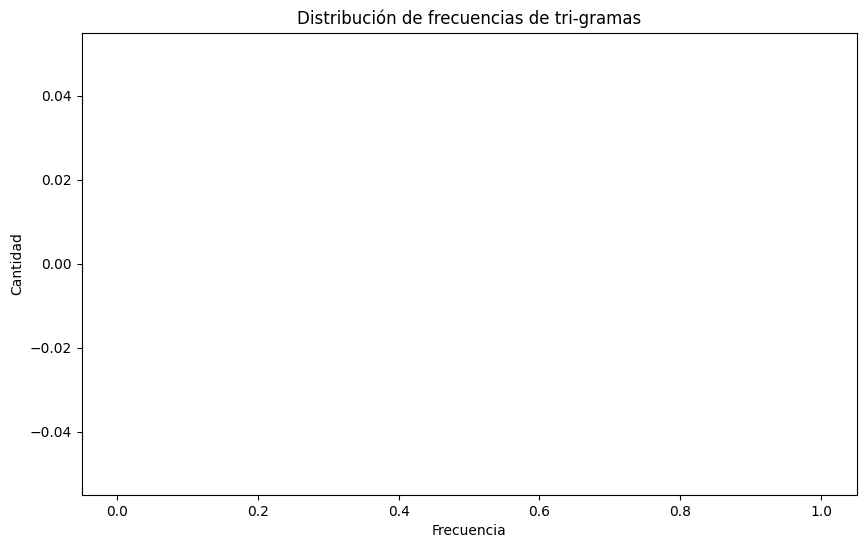

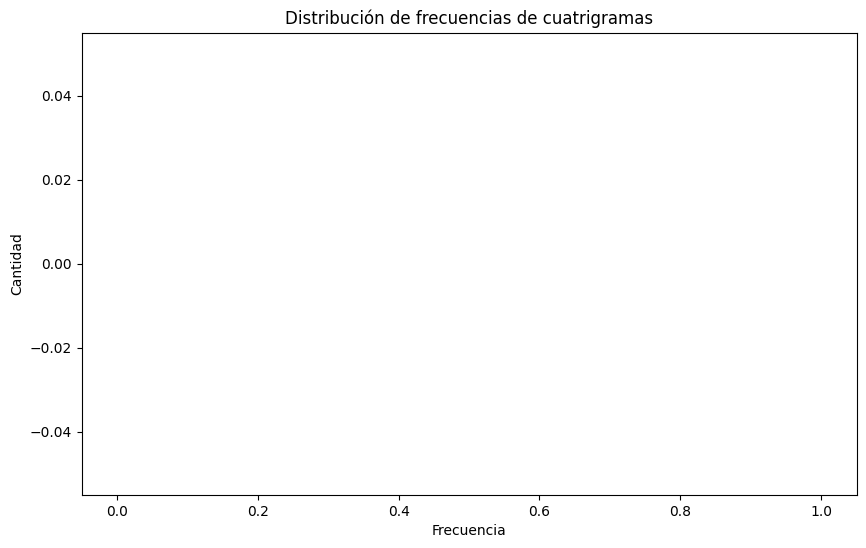

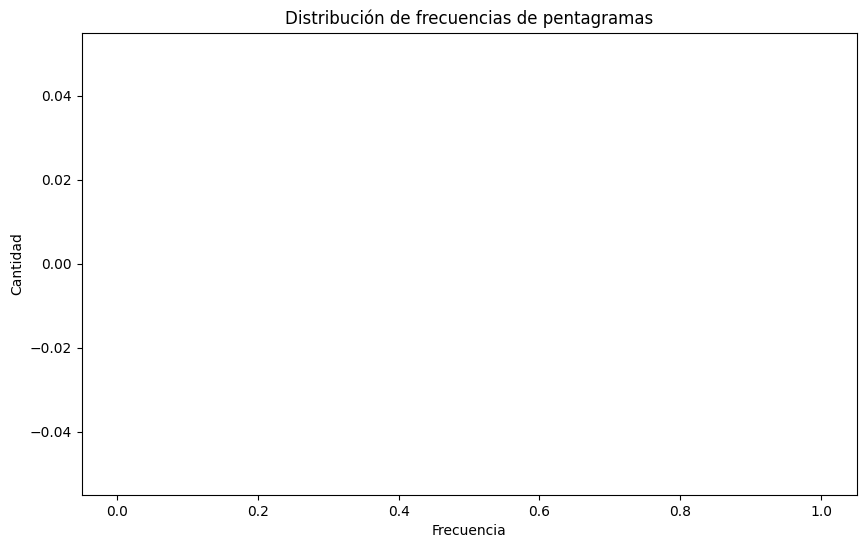

In [37]:
# Graficar la distribución de frecuencias de los tri-gramas
plt.figure(figsize=(10, 6))
plt.hist(freq_ngramas_3.values(), bins=10)
plt.xlabel("Frecuencia")
plt.ylabel("Cantidad")
plt.title("Distribución de frecuencias de tri-gramas")
plt.show()

# Graficar la distribución de frecuencias de los cuatrigramas
plt.figure(figsize=(10, 6))
plt.hist(freq_ngramas_4.values(), bins=10)
plt.xlabel("Frecuencia")
plt.ylabel("Cantidad")
plt.title("Distribución de frecuencias de cuatrigramas")
plt.show()

# Graficar la distribución de frecuencias de los pentagramas
plt.figure(figsize=(10, 6))
plt.hist(freq_ngramas_5.values(), bins=10)
plt.xlabel("Frecuencia")
plt.ylabel("Cantidad")
plt.title("Distribución de frecuencias de pentagramas")
plt.show()
